# Investimenti immateriali


- Capital formation by industry (NACE Rev.2) and detailed asset type
- nama_10_a64_p5
- https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/nama_10_a64_p5?geo=IT&time=2023
- "id":["freq","unit","nace_r2","asset10","na_item","geo","time"]



Il grafico Prometeia riporta:

**Investimenti immateriali (al netto di formazione, brand, design, organizzazione) sul totale investimenti**

Con i `asset10` disponibili, **possiamo solo considerare queste due componenti immateriali “core”**:

| Codice   | Descrizione                                 | Includere |
| -------- | ------------------------------------------- | --------- |
| `N1171G` | **Research and development (gross)**        | ✅ Sì      |
| `N1173G` | **Computer software and databases (gross)** | ✅ Sì      |

Gli altri componenti immateriali (es. opere originali, brand, design, formazione, organizzazione aziendale) **non sono presenti come codice separato** ⇒ **non possiamo includerli né escluderli da `N117G`**.



### Totale da usare come denominatore

Per il denominatore abbiamo due opzioni:

| Codice | Descrizione                           | Usare per %                                                  |
| ------ | ------------------------------------- | ------------------------------------------------------------ |
| `N11G` | **Total fixed assets (gross)**        | ✅ Sì                                                         |
| `N1G`  | Produced non-financial assets (gross) | ❌ No – include anche scorte e beni preziosi (`N12G`, `N13G`) |

**Usiamo `N11G` per replicare il totale investimenti fissi lordi (GFCF - P51G)**.



### Schema finale: solo componenti disponibili

**Quota % = (`N1171G` + `N1173G`) / `N11G`**



### 📦 Riassunto dei `asset10` disponibili e uso consigliato

| Codice   | Descrizione                             | Tipo           | Includere per quota immateriali            |
| -------- | --------------------------------------- | -------------- | ------------------------------------------ |
| `N117G`  | Intellectual property products (gross)  | Aggregato      | ❌ No *(include anche design, brand, ecc.)* |
| `N1171G` | Research and development (gross)        | Intangibile    | ✅ Sì                                       |
| `N1173G` | Computer software and databases (gross) | Intangibile    | ✅ Sì                                       |
| `N11G`   | Total fixed assets (gross)              | Totale invest. | ✅ Sì (denominatore)                        |




In [15]:
import pandas as pd
from eurostat_utils import fetch_eurostat_data

countries = ["IT", "DE", "FR", "ES", "UK"]
assets = {
    "total": "N11G",        # Totale investimenti fissi lordi
    "r_d": "N1171G",        # Ricerca e sviluppo
    "software": "N1173G"    # Software e banche dati
}

# Download dati separati per ciascun asset e paese
dfs = []
for name, asset_code in assets.items():
    for geo in countries:
        df = fetch_eurostat_data("nama_10_a64_p5", {
            "na_item": "P51G",
            "unit": "CP_MEUR",
            "nace_r2": "TOTAL",
            "asset10": asset_code,
            "geo": geo
        })
        df["asset"] = name
        dfs.append(df)

# Concatenazione e ristrutturazione
df_all = pd.concat(dfs)


'''"BE":"Belgium","BG":"Bulgaria","CZ":"Czechia","DK":"Denmark","DE":"Germany","EE":"Estonia","IE":"Ireland","EL":"Greece","ES":"Spain","FR":"France","HR":"Croatia",
"IT":"Italy","CY":"Cyprus","LV":"Latvia","LT":"Lithuania","LU":"Luxembourg","HU":"Hungary","MT":"Malta","NL":"Netherlands","AT":"Austria","PL":"Poland","PT":"Portugal",
"RO":"Romania","SI":"Slovenia","SK":"Slovakia","FI":"Finland","SE":"Sweden","IS":"Iceland","NO":"Norway","CH":"Switzerland","UK":"United Kingdom","BA":"Bosnia and Herzegovina",
"ME":"Montenegro","MK":"North Macedonia","AL":"Albania","RS":"Serbia"'''

'"BE":"Belgium","BG":"Bulgaria","CZ":"Czechia","DK":"Denmark","DE":"Germany","EE":"Estonia","IE":"Ireland","EL":"Greece","ES":"Spain","FR":"France","HR":"Croatia",\n"IT":"Italy","CY":"Cyprus","LV":"Latvia","LT":"Lithuania","LU":"Luxembourg","HU":"Hungary","MT":"Malta","NL":"Netherlands","AT":"Austria","PL":"Poland","PT":"Portugal",\n"RO":"Romania","SI":"Slovenia","SK":"Slovakia","FI":"Finland","SE":"Sweden","IS":"Iceland","NO":"Norway","CH":"Switzerland","UK":"United Kingdom","BA":"Bosnia and Herzegovina",\n"ME":"Montenegro","MK":"North Macedonia","AL":"Albania","RS":"Serbia"'

In [16]:
df_pivot = df_all.pivot_table(index=["geo_label", "time"], columns="asset", values="value").reset_index()
# Calcolo quota % immateriali (solo R&D + Software) sul totale
df_pivot["pct_intan"] = (df_pivot["r_d"] + df_pivot["software"]) / df_pivot["total"] * 100

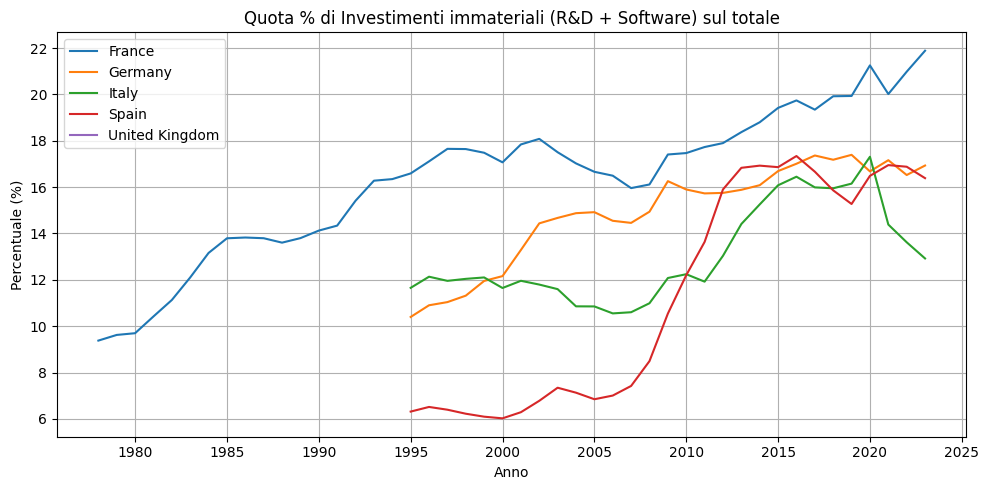

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for country in df_pivot["geo_label"].unique():
    subset = df_pivot[df_pivot["geo_label"] == country]
    plt.plot(subset["time"], subset["pct_intan"], label=country)

plt.title("Quota % di Investimenti immateriali (R&D + Software) sul totale")
plt.ylabel("Percentuale (%)")
plt.xlabel("Anno")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


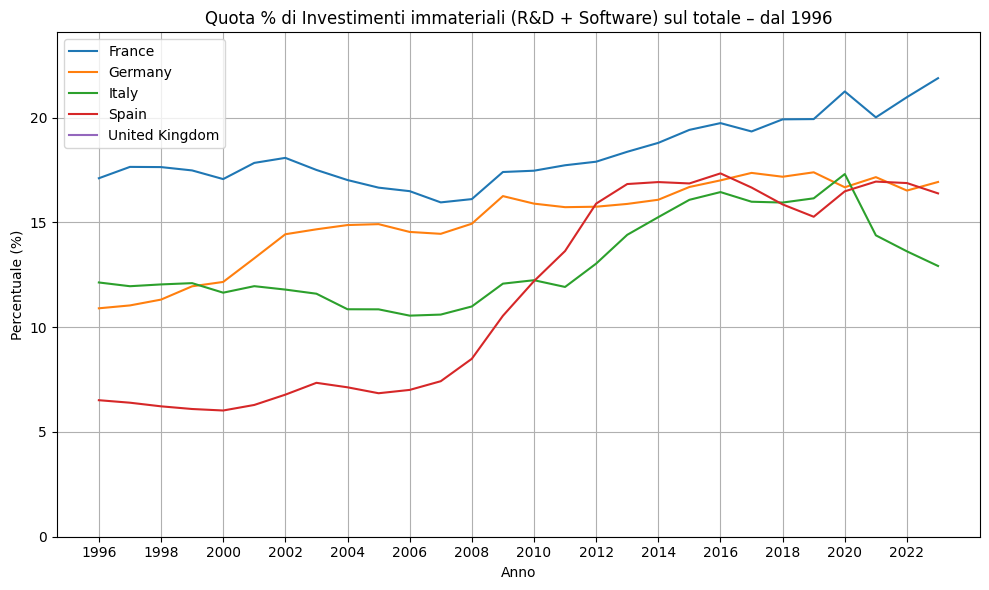

In [18]:
df_pivot["year"] = pd.to_datetime(df_pivot["time"]).dt.year
df_pivot_1996 = df_pivot[df_pivot["year"] >= 1996].copy()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for country in df_pivot_1996["geo_label"].unique():
    subset = df_pivot_1996[df_pivot_1996["geo_label"] == country]
    plt.plot(subset["year"], subset["pct_intan"], label=country)

plt.title("Quota % di Investimenti immateriali (R&D + Software) sul totale – dal 1996")
plt.ylabel("Percentuale (%)")
plt.xlabel("Anno")
plt.xticks(range(1996, 2024, 2))
plt.ylim(0, df_pivot_1996["pct_intan"].max() * 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## tabella stacked italia

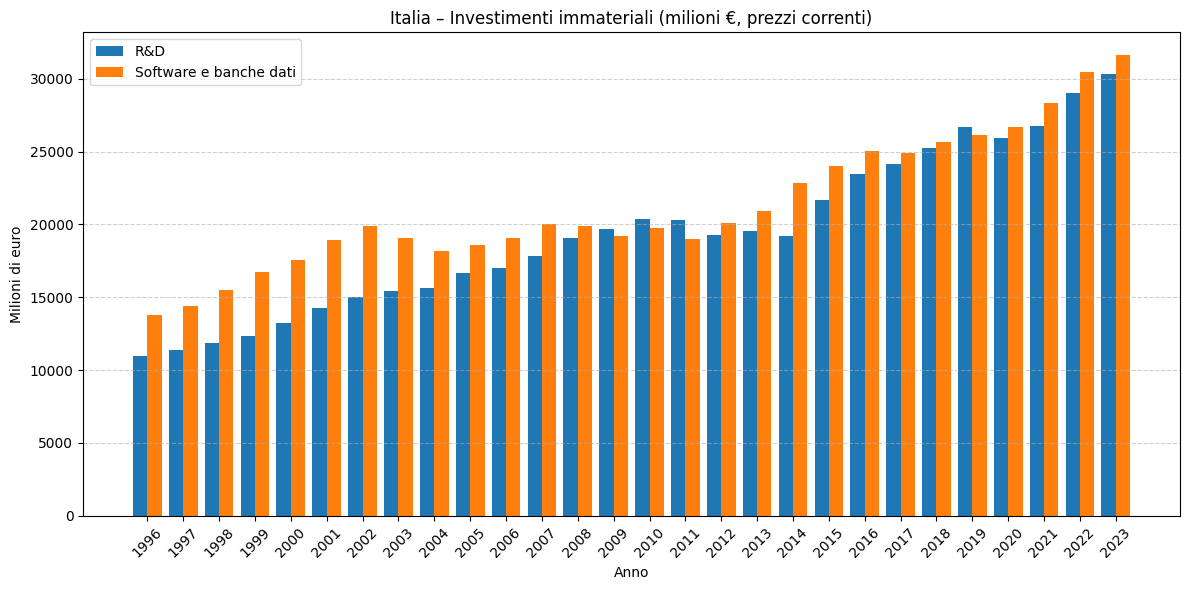

In [23]:
# Supponiamo che df_pivot_1996 contenga già i dati veri estratti da Eurostat
# e sia filtrato per geo_label == "Italy"

# Simuliamo che df_pivot_1996 sia disponibile (qui ricreo un subset realistico per l'Italia)
# In pratica, devi sostituire questa simulazione con il tuo df_pivot_1996 filtrato

# Esempio simulato basato sulla struttura corretta
df_ita_veri = df_pivot_1996[df_pivot_1996["geo_label"] == "Italy"].copy()
df_ita_veri["year"] = pd.to_datetime(df_ita_veri["time"]).dt.year

# Barplot affiancato con dati reali
x = np.arange(len(df_ita_veri))
bar_width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, df_ita_veri["r_d"], width=bar_width, label="R&D")
plt.bar(x + bar_width/2, df_ita_veri["software"], width=bar_width, label="Software e banche dati")

plt.xticks(ticks=x, labels=df_ita_veri["year"], rotation=45)
plt.title("Italia – Investimenti immateriali (milioni €, prezzi correnti)")
plt.ylabel("Milioni di euro")
plt.xlabel("Anno")
plt.legend()
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Ottima domanda! Se vuoi ampliare l’analisi sugli **investimenti immateriali**, la **composizione degli investimenti**, o i **confronti internazionali**, ecco una selezione di dataset Eurostat (e non solo) **utili e complementari** al tuo lavoro, in particolare per costruire serie come quella Prometeia.

---

## 🧮 **Eurostat – Capital Formation e Asset Detail**

| Dataset ID         | Descrizione                                                    | Note                                                              |
| ------------------ | -------------------------------------------------------------- | ----------------------------------------------------------------- |
| `nama_10_a64_p5`   | ✅ **Gross Fixed Capital Formation (P51G)** per asset (ESA2010) | Include `N1171G`, `N1173G`, `N11G`, utilizzato per il tuo grafico |
| `nama_10_an6`      | Investimenti per asset aggregati                               | Solo `N117G`, meno utile se servono componenti separati           |
| `nama_10_gdp`      | PIL a prezzi correnti e concatenati                            | Utile per % investimento/PIL                                      |
| `nama_10_gdp_defl` | Deflatori del PIL                                              | Per calcolare valori reali da CP\_MEUR                            |
| `nama_10_fkm`      | Investimenti per settore istituzionale                         | Approfondisce chi investe (famiglie, imprese, PA)                 |
| `nama_10_nfa_fl`   | ❌ (non esiste più come previsto)                               | Un tempo conteneva ESA2010 AN.1121-1127 separati                  |
| `nama_10_a10`      | Valore aggiunto per settore A10 NACE                           | Per confrontare investimenti vs valore prodotto                   |

---

## 💼 **Eurostat – Approfondimento imprese e innovazione**

| Dataset ID                  | Descrizione                                     | Note                                                 |
| --------------------------- | ----------------------------------------------- | ---------------------------------------------------- |
| `inn_cis11` (o `inn_cis`\*) | Innovation Survey (Community Innovation Survey) | % imprese con investimenti in R\&D, software, design |
| `isoc_bde15cap`             | ICT investments in EU enterprises               | Dettaglio su software e tecnologie                   |
| `bd_9bd_sz_cl_r2`           | Imprese per classe dimensionale                 | Utile per normalizzare investimenti per addetto      |

---

## 🌍 **Fonti complementari non Eurostat (per UK / USA)**

| Fonte         | Indicatore / Dataset                 | Note                                               |
| ------------- | ------------------------------------ | -------------------------------------------------- |
| **ONS (UK)**  | Capital stocks, GFCF, IPP componenti | Include Software, R\&D, Artistic Originals         |
| **BEA (USA)** | Fixed Assets Table 2.7, 2.9, 7.1     | Include "Intellectual Property Products", separati |
| **OECD.STAT** | GFCF by asset type, R\&D intensity   | Ottimo per confronti internazionali                |

---

## 🧰 Strumenti utili per calcoli avanzati

* **`nama_10_an6` + `nama_10_gdp`** ➜ % investimenti immateriali su PIL
* **`nama_10_fkm`** ➜ quota investimenti immateriali della PA o famiglie
* **`inn_cis11`** ➜ % imprese che innovano per settore e paese
* **`nama_10_gdp_defl`** ➜ conversione CP\_MEUR → valori reali


